# Module import

## Collaborators: 
- Mr. Wyatt Napier
- Mr. Jae Lee

In [453]:
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd
import random
import csv

In [454]:
# You can import other modules if needed
from numpy import linalg as LA


# 1. Visualize a mixture of Gaussians [15 pts]

Consider a mixture of two 2D Gaussian distrbutions as follows $$
0.4\cdot \mathcal{N}\left(\left[\begin{array}{c} 
10\\
2
\end{array}\right], \left[\begin{array}{cc} 
1, 0\\
0, 1
\end{array}\right]\right) + 0.6\cdot \mathcal{N}\left(\left[\begin{array}{c} 
0\\
0
\end{array}\right], \left[\begin{array}{cc} 
8.4, 2.0\\
2.0, 1.7
\end{array}\right]\right)
$$ 

a. Compute the marginal distributions for each dimension.

b. Compute the mean for each marginal distribution.

c. Compute the mean for the two-dimensional distribution.

d. Generate both joint and marginal density of this distribution by taking at least 10 thousand samples. Please refer to [Lab4 notebook](https://piazza.com/class_profile/get_resource/lrgnqll42av781/lsigbj4an34as) for the visualization approach.

Type the answers to first three questions here:

a. Compute the marginal distributions for each dimension.

$$ 
p(x_1) = 0.4 \cdot \mathcal{N} (10,1) + 0.6 \cdot \mathcal{N} (0, 8.4)
$$
$$
p(x_2) = 0.4 \cdot \mathcal{N} (2, 1) + 0.6 \cdot \mathcal{N} (0, 1.7)
$$

b. Compute the mean for each marginal distribution.
$$
\mu_{x_1} = 0.4 \cdot 10 + 0.6 \cdot 0 = 4
$$

$$
\mu_{x_2} = 0.4 \cdot 2 + 0.6 \cdot 0 = 0.8
$$

c. Compute the mean for the two-dimensional distribution.

$$\mu = 0.4 \cdot \left[\begin{array}{c}
10\\
2
\end{array}\right] + 0.6 \cdot \left[\begin{array}{c}
0\\
0
\end{array}\right] = \left[\begin{array}{c}
4\\
0.8
\end{array}\right]
$$


/Users/aditya/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/aditya/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/aditya/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/aditya/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categorica

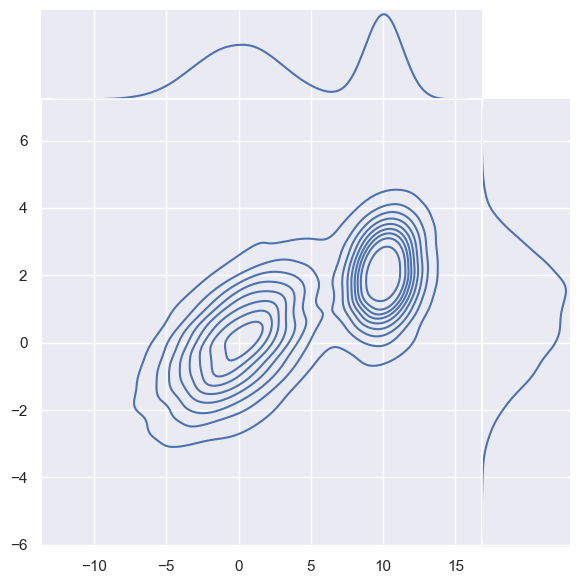

In [455]:
# Your code for question d here
# Define dimension. 
d = 2

# Set mean vector. 
m_1 = np.array([10, 2]).reshape(2, 1)
m_2 = np.array([0, 0]).reshape(2, 1)

def generate_samples(K_0, m, d, n):
    epsilon = 0.0001
    K = K_0 + epsilon*np.identity(d)
    L = np.linalg.cholesky(K)
    u = np.random.normal(loc=0, scale=1, size=d*n).reshape(d, n)

    x = m + np.dot(L, u)
    return x

# K_0 = np.array([[1, 0],
#                 [0, 1]])
K_1 = np.array([[1,0],[0,1]])
K_2 = np.array([[8.4, 2.0],[2.0, 1.7]])
x = generate_samples(K_1, m_1, d,4000)
y = generate_samples(K_2, m_2, d, 6000)
z = np.hstack((x,y))
sns.jointplot(x=z[0], y=z[1], kind="kde", space=0);

# 2. Simulation: Drop needles [15 pts]

Suppose we have a floor made of parallel strips of wood, each the same width $t$, and we drop a needle with length $l=t$ onto the floor. What is the probability that the needle will lie across a line between two strips?

Below is an example of two needles dropped. Needle a falls across a line, while needle b does not.

![Example](needle.png)

In this coding homework, we will simulate such experiments and connect them with the estimation of $\pi$.

## Functions

The first thing to write is a function *drop_needle*. It simulates dropping a needle onto the floor we described and returns whether the needle lies across a line between two strips. 

Now the question is how to describe the position of a needle using random variables. The figure below visualizes a needle sampled, with $t=l=1$ (see figure above). Remember that the needle should have an equal probability of landing in any position. In fact, we can uniformly sample the position of the needle's mass center and then uniformly sample the angle formed by the needle and the x-axis. Specifically, we only focus on the mass center's position with respect to (w.r.t.) the x-axis since we can assume the strip is long enough.

Besides, we do not need to sample the x-value of the center from $-\inf$ to $\inf$. Instead, we can uniformly sample it from $0$ to $2t$. Why is this the case?

![needleExmple2](needleExmple2.png)

In [456]:

def drop_needle(strip_length, needle_length):
    """
    Simulate dropping a needle on to the floor made of parallel strips of woods.
    Return whether the needle lie across a line between two strips.

    :return: An Integer that equals to 1 if the needle lie across a line, and 0 otherwise.
    """ 
    
    # write your code here
    x = np.random.uniform(low=0,high=2*needle_length)
    theta = np.random.uniform(low=0,high=np.pi)
    len = (needle_length/2)*np.abs(np.cos(theta))
    line_ceil = math.ceil(x-len)
    line_floor = math.floor(x+len)
    # print("angle", np.degrees(theta))
    # print(line_floor,line_ceil, x-len, x+len)
    if (line_ceil == line_floor):
        # print("The above output returns 1")
        return 1
    else:
        # print("The above output returns 0")
        return 0
 
    


Next, write a function run_simulation that calls drop_needle repetitively for n times. The function should return the probability that a dropped needle lies across a line based on the n trials.

In [457]:
def run_simulation(n, strip_length, needle_length):

    """
    Repeat drop_needle experiment for n times. Return the probability that the needle will lie across a line. 

    :return: float, the probability that the needle will lie across a line according to the n experiments.
    """ 
    # Write your code here
    counter = 0
    for i in range(n):
        counter += drop_needle(strip_length, needle_length)
    return counter/n


## Run the simulation

Run the *run_simulation* function 500 times with parameters n=1000, strip_length=1, and needle_length=1. Each time the function is going to return a probability of the needle lying across the line. Plot a histogram of those 500 probabilities. 

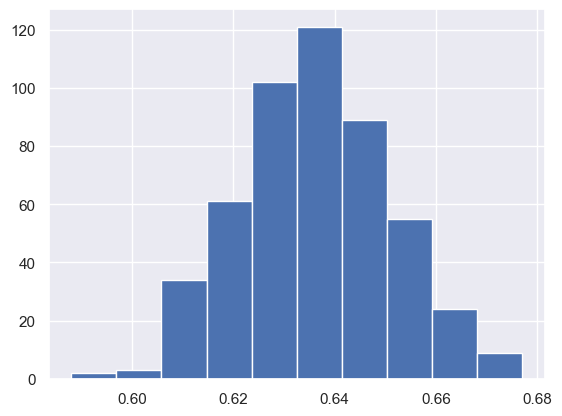

In [458]:
# Write your code here
output = np.empty((0,))
for i in range(500):
    output = np.append(output, run_simulation(1000,1,1))

plt.hist(output)
plt.show()


# 3. Email Spam Naive Bayes [35 pts]


## Naive Bayes

For a classification task, we aim to predict a binary label $Y\in \{0,1\}$ of an example given its $d$ dimensional features $X_1,X_2,...,X_d$. Bayes Theorem states the (posterior) porbability of have a label $Y$ given the feature observations as follows:

$$P(Y|X_1,X_2,...,X_d) = \frac{P(Y)*P(X_1,X_2,...,X_d|Y)}{P(X_1,X_2,...,X_d)}$$

Note $P(Y)$ is called priori, i.e., probability of seeing label $Y$ without observing the features. To determine the binary label $Y$, we need to compare $P(Y=0|X_1,X_2,...,X_d)$ with $P(Y=1|X_1,X_2,...,X_d)$. In Bayes Theorem, the fractions representing both conditional probabilities have the same denominator $P(X_1,X_2,...,X_d)$. Thus we can ignore the denominator and only focusing on 
$$P(Y|X_1,X_2,...,X_d) \propto P(Y)*P(X_1,X_2,...,X_d|Y)$$

Next, we make a strong assumption: no pair of features in the dataset are dependent (this is the reason why we call it *Naive* Bayes). Under such assumption, $P(X_1,X_2,...,X_d|Y)=P(X_1|Y)*P(X_2|Y)*...*P(X_d|Y)$. Therefore, we conclude

$$P(Y|X_1,X_2,...,X_n) \propto P(Y)*P(X_1|Y)*P(X_2|Y)*...*P(X_d|Y)$$

The classifier will decide what class each input belongs to based on highest probability from the equation above.

How do we know the priori $P(Y)$ and the conditional probabilities $P(X_i|Y)$? In supervised classification tasks we have labeled data available (we call it training set). We can thus estimate these probabilities based on the training data.

## Overview/Task

The goal of this programming assignment is to build a naive bayes classifier from scratch that can determine whether email text should be labled spam or not spam based on its contents

## Reminders

Please remember that the classifier must be written from scratch; do NOT use any libraries that implement the classifier for you, such as but not limited to sklearn.

You CAN, however, use SKlearn to split up the dataset between testing and training.

Feel free to look up any tasks you are not familiar with, e.g. the function call to read a csv

## Task list/Recommended Order

In order to provide some guidance, I am giving the following order/checklist to solve this task:
<ol>
  <li>Compute the "prior": P(Y) for Y = 0 (not spam) and Y = 1 (spam)</li>
  <li>Compute the "likelihood": $P(X_n|Y)$. In this task, we recommend you to start with setting up a dictionary of words appeared in the training set $W=\{w_1,w_2\dots \}$, and constructing feature set $\{X_1,X_2\dots \}$ where $X_i$ is a binary indicator of whether the word $w_i$ exists in the text or not. Feel free to add preprocessing and modify the features if that can increase your accuracy!</li>
  <li>Write code that uses the two items above to make a decision on whether or not an email is spam or ham (aka not spam)</li>
  <li>Write code to evaluate your model. Test model on training data to debug </li>
  <li>Test model on testing data to debug </li>
</ol>

## Function template

In [459]:
# ham_length = 0 
# spam_length = 0 
def prior(df):
    ham_prior = 0
    spam_prior =  0
    '''YOUR CODE HERE'''
    for value in df["label_num"]:
        if value == 0:
            ham_prior += 1
        else:
            spam_prior += 1
    ham_prior = ham_prior/(spam_prior+ham_prior)
    spam_prior = 1 - ham_prior
    '''END'''
    return ham_prior, spam_prior

def likelihood(df):
    ham_like_dict = {}
    spam_like_dict = {}

    '''YOUR CODE HERE'''
    global ham_length
    global spam_length 
    stopwords = "i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mustn't, needn, needn't, shan, shan't, shouldn, shouldn't, wasn, wasn't, weren, weren't, won, won't, wouldn, wouldn't"
    ham_length = 0
    spam_length = 0
    for i in range(len(df["text"])):
        line = df["text"].iloc[i]
        temp = set(line.split())
        if (df["label_num"].iloc[i] == 0):
            for word in temp:
                word = word.lower()
                ham_length += 1
                if word not in ham_like_dict:
                    ham_like_dict[word] = 0
                ham_like_dict[word] += 1
        else:
            for word in temp:
                word = word.lower()
                spam_length += 1
                if word not in spam_like_dict:
                    spam_like_dict[word] = 0
                spam_like_dict[word] += 1
    for key in ham_like_dict:
        ham_like_dict[key] = ham_like_dict[key]/ham_length
    for key in spam_like_dict:
        spam_like_dict[key] = spam_like_dict[key]/spam_length


    '''END'''
    return ham_like_dict, spam_like_dict

def predict(ham_prior, spam_prior, ham_like_dict, spam_like_dict, text):
    '''
    prediction function that uses prior and likelihood structure to compute proportional posterior for a single line of text
    '''
    #ham_spam_decision = 1 if classified as spam, 0 if classified as normal/ham
    ham_spam_decision = None

    '''YOUR CODE HERE'''
    #ham_posterior = posterior probability that the email is normal/ham
    ham_posterior = 1
    #spam_posterior = posterior probability that the email is spam
    spam_posterior = 1
    temp = text.split()


    


    for word in temp:
        if word in ham_like_dict:
            ham_posterior *= ham_like_dict[word]
        else:
             ham_posterior *= 0.5/ham_length
        if word in spam_like_dict:
            spam_posterior *= spam_like_dict[word]
        else:
            spam_posterior *= 0.5/spam_length

    if ham_prior*ham_posterior > spam_prior*spam_posterior:
        ham_spam_decision = 0
    else:
        ham_spam_decision = 1
    '''END'''
    return ham_spam_decision


def metrics(ham_prior, spam_prior, ham_dict, spam_dict, df):
    precision = 0
    recall = 0
    '''
    Calls "predict" function and report accuracy, precision, and recall of your prediction
    '''
    
    '''YOUR CODE HERE'''
    acc = 0
    tru_pos = 0
    identified_spam = 0
    actual_spam = 0 
    for i in range(len(df["text"])):
        text = df["text"].iloc[i]
        val = predict(ham_prior, spam_prior, ham_dict, spam_dict, text)
        if (val == df["label_num"].iloc[i]):
            acc += 1
        if (val == 1 and df["label_num"].iloc[i] == 1):
            tru_pos += 1
        if (val == 1):
            identified_spam += 1
        if (df["label_num"].iloc[i] == 1):
            actual_spam += 1
            
    acc = acc/len(df["text"])
    precision = tru_pos/identified_spam
    recall = tru_pos/actual_spam
    '''END'''
    return acc, precision, recall

In [460]:
train_df = pd.read_csv("./TRAIN_balanced_ham_spam.csv")
test_df = pd.read_csv("./TEST_balanced_ham_spam.csv")
df = train_df



## Generate answers with your functions

In [462]:
#loading in the training data
train_df = pd.read_csv("./TRAIN_balanced_ham_spam.csv")
test_df = pd.read_csv("./TEST_balanced_ham_spam.csv")
df = train_df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2398 entries, 0 to 2397
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0.1  2398 non-null   int64 
 1   Unnamed: 0    2398 non-null   int64 
 2   label         2398 non-null   object
 3   text          2398 non-null   object
 4   label_num     2398 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 93.8+ KB


In [463]:
#compute the prior
ham_prior, spam_prior = prior(df)


In [464]:
# compute likelihood
ham_dict, spam_dict = likelihood(df)


In [465]:
# Test your predict function with some example TEXT

some_text_example = "Subject: half day of vac on 2 / 28 12 . 20 dentist appt on 2 / 29"

predict(ham_prior, spam_prior, ham_dict, spam_dict, some_text_example)

0

In [466]:
# Predict on test_df and compute metrics 
    
df = test_df.copy()
acc, precision, recall = metrics(ham_prior, spam_prior, ham_dict, spam_dict, df)
print(acc, precision, recall)

0.7166666666666667 0.6484018264840182 0.9466666666666667


# 4. Gradient Decent [35 pts]

## Exact Gradient Computation

Given a function f, sometimes we can compute its exact gradient at any x if f's derivative is easy to compute. For example, let $f(x)=2x^2-3x+\ln x$, where $x>0$. Please compute the derivative of f and report its gradient at $x=2$.

Your answer: 

$$ \frac{d}{dx}(2x^2 -3x + \ln x) $$
$$ = 4x - 3 + \frac{1}{x} $$
At two it is: 
$$ 8 -3 + \frac{1}{2}$$
$$= 5.5 $$

## Numerical Gradient Computation

Instead of computing the derivative of a function, we can also estimate the gradient numerically with various methods. These methods are essential, especially when a callable function is not exposed due to privacy reasons, or it is hard to differentiate analytically. 

To numerically compute the gradient, the simple way is to follow Newton's difference quotient: $f'(x)=\lim_{h\to 0}{f(x+h)-f(x)\over h}$. Another two-point formula is to compute the slope through the points $(x-h,f(x-h))$ and $(x+h,f(x+h))$. Let us reuse the example function $f(x)=2x^2-3x+\ln x$ and test the precision of these two approaches. Define the function in the next cell, and try to compute its gradient via both methods at $x=2$. Range h value in [0.1,0.01,0.001,0.0001] and report all gradients calculated. Which method is more accurate, and why does it work better?

In [467]:
def f(x):
    # Your code here
    return 2*x**2 - 3*x + np.log(x);

In [468]:
# Compute gradient using the first method (Newton's difference quotient)
hs = [0.1,0.01,0.001,0.0001]
for h in hs:
    print((f(2+h)-f(2))/h)

5.687901641694317
5.518754151103744
5.50187504165045
5.5001875004201395


In [469]:
# Compute gradient using the second method 
hs = [0.1,0.01,0.001,0.0001]
for h in hs:
    print((f(2+h) - f(2-h))/(2+h - (2-h)))

5.500417292784904
5.500004166729123
5.500000041666448
5.500000000412448


#### Remark 
You may find the gradient more accurate when using a smaller h value. However, this is not always the case. Due to the finite precision of the floating-point, rounding errors always exist and can dominate the computation when the h value is too small. Run the following two cells to observe such scenarios.

In [470]:
eps = 1e-15
print((f(2+eps)-f(2-eps))/2/eps)

5.551115123125783


In [471]:
eps = 1e-20
print((f(2+eps)-f(2-eps))/2/eps)

0.0


## Logistic regression

Logistic regression is a classification tool that models the probability of an event taking place by having the log odds for the event be a linear combination of one or more independent variables. Specifically, let $\vec{x}=<x_1,\dots ,x_m>$ be an m dimensional vector of independent variables (features), and $y$ be the corresponding binary dependent variable (label). The probability of having $y=1$ is modeled as $$P_y={1\over 1+e^{-(b_0+b_1\cdot x_1+\dots +b_m\cdot x_m)}}={1\over 1+e^{-(b_0+\vec{b}_{1:m}\cdot\vec{x})}}$$

Given a set of data points $<\vec{x}_k,y_k>$ with $k\in [1,n]$, how can we fit the model with these data, i.e., how to choose the best $\vec{b}=b_0,b_1\cdots,b_m$?

One way is to write out the likelihood $$\prod_{k:y_k=1}P_{y_k}\prod_{k:y_k=0}(1-P_{y_k})$$ and find $b_0,b_1\cdots,b_m$ that maximize its logarithm, $$l=\sum_{k:y_k=1}\ln(P_{y_k})+\sum_{k:y_k=0}\ln(1-P_{y_k})$$

In contrast to computing the closed form gradient of a Least-squares loss in a linear model (chapter 5 of MML book), doing the same for logistic regression is not possible. Gradient descent can be used to optimize such function $l$, and we will implement it step-by-step. First, write a function log_likelihood in the next cell that computes the log-likelihood given data points and $\vec{b}$. [5 pts]

In [486]:
import numpy as np
import sklearn

In [487]:
def log_likelihood(X,y,b):
    """
    X: n*m numpy data array.
    y: one dimension numpy data array of length n
    b: one dimension numpy data array of length m+1
    
    Return the log likelihood.
    """
    l_sum = 0
    r_sum = 0
    for k in range(len(X)): # first loop through all of the k
      P_k = 0.0
      exponent = 0
      for j in range(len(b)): # calculate the exponent for e in P_k
        if j == 0:
          exponent = b[0]
          continue

        exponent += b[j]*X[k][j-1]

      exponent *= -1 # exponent needs to be negative
      P_k = 1/(1+np.exp(exponent))
      if y[k] == 1:
        l_sum += np.log(P_k)
      else:
        r_sum += np.log(1-P_k)
    return l_sum + r_sum

### Test your log_likelihood function with a small example below.

In [502]:
X=np.array([[0.1],[0.5],[1.]])
y=np.array([0,0,1])
b=np.array([0.,1.])
# Your answer should be around -2.03
log_likelihood(X,y,b)

-2.031735331771901

Now that we have a function to maximize, the next step is to compute the gradient of the log-likelihood with respect to parameter $\vec{b}$. Use the method with Newton's difference quotient, and set $h=0.0001$. Implement the function compute_gradient in the next cell. [7 pts]

In [503]:
def compute_gradient(X,y,b):
# The inputs are the same as the ones of log_likelihood
  h = 0.0001
  gradient = [0]*len(b)
  for i in range(len(b)):
    temp_b = b.copy()
    temp_b[i] += h
    gradient[i] = (log_likelihood(X, y, temp_b) - log_likelihood(X, y, b))/h
  return gradient

In [504]:
# Test your function here, preserve the output
compute_gradient(X,y,b)

[-0.8785311466219525, -0.09479905564102609]

Once we know how to compute the gradients, we can optimize the objective, which is log-likelihood in our case, using gradient descent. It iteratively changes the parameters in a small "step" towards the gradient direction, i.e., the direction where the objective increases at the fastest pace. Formally, denote the calculated gradients as $\Delta (\vec{b})$, we can update our parameters via $\vec{b}=\vec{b}+\gamma \cdot \Delta (\vec{b})$, where $\gamma$ is the size of the "step". Repeat this process until the objective stop improving or a pre-set max number of iterations is reached. **Note in practice, the value of gradient changes over iterations and can be very large/small, so you should normalize the gradient vector every iteration, i.e., scale it to $\Delta (\vec{b})\over ||\Delta (\vec{b})||_2$, before using it to compute the new $\vec{b}$. Therefore, the update rule for parameters becomes $\vec{b}=\vec{b}+\gamma \cdot {\Delta (\vec{b})\over ||\Delta (\vec{b})||_2}$**.

Implement the gradient_descent function below. [7 pts]

In [509]:
def gradient_descent(X, y, initial_b, step_size, max_iteration):
    """
    X: n*m numpy data array.
    y: one dimension numpy data array of length n
    initial_b: one dimension numpy data array of length m+1
    step_size: scalar, the size of one step update
    max_iteration: scalar, the max number of iterations
    Return the updated coefficient vector b.
    """
    b = initial_b.copy()
    for i in range(max_iteration):
        gradient_vector = compute_gradient(X,y,b)
        b = b + step_size*(gradient_vector/LA.norm(gradient_vector, 2))
        initial_b = b.copy()
    return b


Test the function with the previous example again. Print for each sample from X, based on your model, the probability of having label=1.

In [510]:
optimized_b = gradient_descent(X, y, b, 0.1, 1000)
X_new = np.append(np.ones((len(X),1)), X, axis=1)
# compute and print the probability for each row in X below using optimized_b
for i in range(X_new.shape[0]):
    exponent = np.dot(X_new[i], np.transpose(optimized_b))
    Py = 1/(1+np.exp(-exponent))
    print("The probability of observing label=1: ",Py, " for ", X[i])
    

The probability of observing label=1:  2.182550875139692e-23  for  [0.1]
The probability of observing label=1:  2.07190378157202e-09  for  [0.5]
The probability of observing label=1:  0.9999999983711769  for  [1.]


Next, we apply the implemented logistic regression model to a real dataset. The dataset is a trimmed breast-cancer-Wisconsin dataset from UCI machine learning Repository. Only 100 data points are offered in the training set to make sure the computation can be finished swiftly, no matter how you implement the optimizer. The training dataset is loaded in the next cell, and the vector $\vec{b}$ is also randomly initialized. 

Fit three models with the training set using different step size ranging in [0.01,0.05,0.1] and set the max number of iterations as 10000. How do the final log-likelihood value and the number of iterations change with different step sizes? 

In [511]:
f = open("breast-cancer-wisconsin.data","r")
X_train = []
y_train = []
for line in f:
    tmp = []
    for part in line.strip().split(",")[1:-1]:
        tmp.append(float(part))
    y_train.append((0 if line.strip().split(",")[-1]=="2" else 1))
    X_train.append(tmp)
X_train = np.array(X_train)
y_train = np.array(y_train)
random_b = np.random.uniform(0,1,size=(10))

In [512]:
# Fit three models with different step size, report the final log-likelihood, 
# number of iterations and the final coefficent vector b.
step = [0.01, 0.05, 0.1]
g1_train = gradient_descent(X_train, y_train, random_b, step[0], 10000)
g2_train = gradient_descent(X_train, y_train, random_b, step[1], 10000)
g3_train = gradient_descent(X_train, y_train, random_b, step[2], 10000)


In [513]:
g_train = [g1_train, g2_train, g3_train]

Finally, load the test dataset, and predict for each sample in the test set what labels it should have using the model obtained. Compare your results with the ground truth labels, and report the accuracy rate.

In [514]:
f = open("test_data.txt","r")
X_test = []
y_test = []
for line in f:
    tmp = []
    for part in line.strip().split(",")[1:-1]:
        tmp.append(float(part))
    y_test.append((0 if line.strip().split(",")[-1]=="2" else 1))
    X_test.append(tmp)


In [515]:
# Predict based on your models and report the accuracy
X = np.append(np.ones((len(X_test),1)), X_test, axis=1)

for i in range(len(g_train)):
    pr = []
    dot_product = np.dot(X, g_train[i])

    for j in range(len(X_test)):
        p_y = 1/(1+np.exp(-dot_product[j]))
        if p_y > 0.5:
            pr.append(1)
        else:
            pr.append(0)
    print("The log likelihood is: ",log_likelihood(X_train,y_train,g_train[i]))
    

    acc = 0
    for i in range(len(pr)):
        if pr[i] == y_test[i]:
            acc += 1 
    print("The probabilities list is: ", pr, " and accuracy is: ", acc/len(pr))
    print()

The log likelihood is:  -7.180354370833561
The probabilities list is:  [0, 1, 1, 1, 1, 1, 0, 1, 0, 0]  and accuracy is:  0.9

The log likelihood is:  -7.2711875945493105
The probabilities list is:  [0, 1, 1, 1, 1, 1, 0, 1, 0, 0]  and accuracy is:  0.9

The log likelihood is:  -7.43273216751979
The probabilities list is:  [0, 1, 1, 1, 1, 1, 0, 1, 0, 0]  and accuracy is:  0.9

